In [13]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np
import mediapipe as mp

In [21]:
# Upload images that contain face(s) within 2 meters from the camera.
from google.colab import files
uploaded_short_range = files.upload()

# Upload images that contain face(s) within 5 meters from the camera.
from google.colab import files
uploaded_full_range = files.upload()

Saving this.jpg to this (4).jpg


Saving rHYG2si3_400x400.jpg to rHYG2si3_400x400 (4).jpg


this.jpg


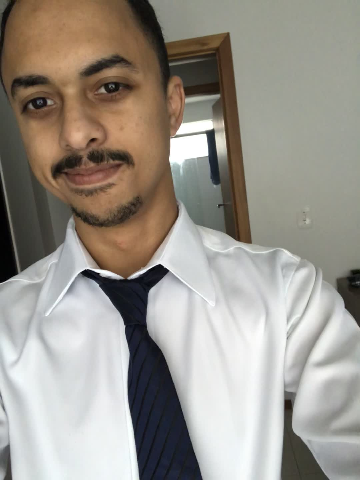

rHYG2si3_400x400.jpg


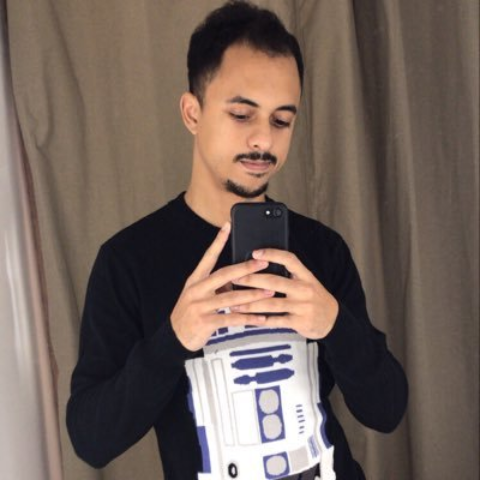

In [22]:
DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Preview the images.
short_range_images = {name: cv2.imread(name) for name in uploaded_short_range.keys()}
for name, image in short_range_images.items():
  print(name)   
  resize_and_show(image)

full_range_images = {name: cv2.imread(name) for name in uploaded_full_range.keys()}
for name, image in full_range_images.items():
  print(name)   
  resize_and_show(image)

In [23]:
mp_face_detection = mp.solutions.face_detection

In [24]:
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

Face detections of this.jpg:


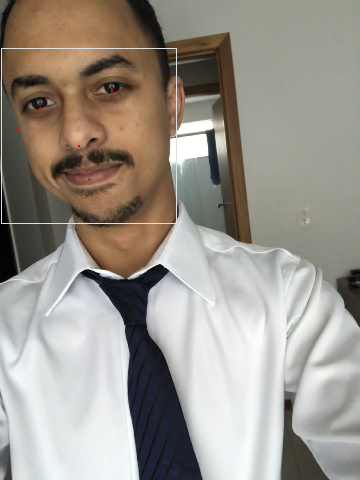

In [25]:
# Run MediaPipe Face Detection with short range model.

with mp_face_detection.FaceDetection(
    min_detection_confidence=0.5, model_selection=0) as face_detection:
  for name, image in short_range_images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face detections of each face.
    print(f'Face detections of {name}:')
    if not results.detections:
      continue
    annotated_image = image.copy()
    for detection in results.detections:
      mp_drawing.draw_detection(annotated_image, detection)
    resize_and_show(annotated_image)

Face detections of rHYG2si3_400x400.jpg:


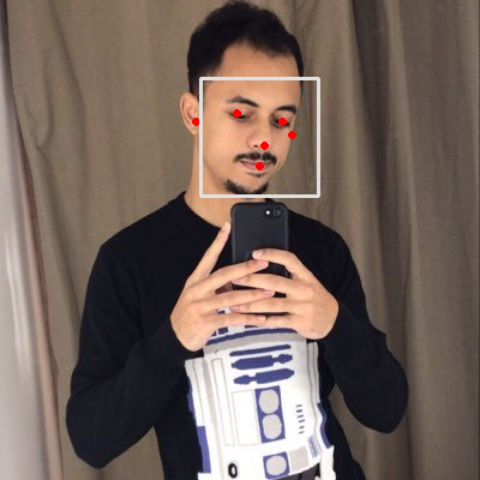

In [26]:
# Run MediaPipe Face Detection with full range model.

with mp_face_detection.FaceDetection(
    min_detection_confidence=0.5, model_selection=1) as face_detection:
  for name, image in full_range_images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face detections of each face.
    print(f'Face detections of {name}:')
    if not results.detections:
      continue
    annotated_image = image.copy()
    for detection in results.detections:
      mp_drawing.draw_detection(annotated_image, detection)
    resize_and_show(annotated_image)